In [1]:
import numpy as np
import clima_anom as ca
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
hgt_dir = '../data/Hgt_500hPa_Jan80_Dec19.nc'

In [3]:
hgt_data = ca.read_netcdf(hgt_dir,2)

hgt : (480, 1, 73, 144)
lat : (73,)
level : (1,)
lon : (144,)
time : (480,)


In [4]:
lat = hgt_data['lat']
lon = hgt_data['lon']-180
tim = hgt_data['time']

In [5]:
hgt_dictionary = ca.clima_anom(hgt_data['hgt'][:,0,:,:])


Keys level 1:  dict_keys(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dec'])
keys level 2:  dict_keys(['data', 'clim', 'anom'])

Numbers of years:  40
Numbers of months:  480


In [6]:
num_anos = 4
serie_anom = np.zeros([12*num_anos,len(lat),len(lon)])
for i in range(num_anos):
    serie_anom[12*i,:,:] = hgt_dictionary['jan']['anom'][i,:,:]
    serie_anom[12*i+1,:,:] = hgt_dictionary['feb']['anom'][i,:,:]
    serie_anom[12*i+2,:,:] = hgt_dictionary['mar']['anom'][i,:,:]
    serie_anom[12*i+3,:,:] = hgt_dictionary['apr']['anom'][i,:,:]
    serie_anom[12*i+4,:,:] = hgt_dictionary['may']['anom'][i,:,:]
    serie_anom[12*i+5,:,:] = hgt_dictionary['jun']['anom'][i,:,:]
    serie_anom[12*i+6,:,:] = hgt_dictionary['jul']['anom'][i,:,:]
    serie_anom[12*i+7,:,:] = hgt_dictionary['ago']['anom'][i,:,:]
    serie_anom[12*i+8,:,:] = hgt_dictionary['sep']['anom'][i,:,:]
    serie_anom[12*i+9,:,:] = hgt_dictionary['oct']['anom'][i,:,:]
    serie_anom[12*i+10,:,:] = hgt_dictionary['nov']['anom'][i,:,:]
    serie_anom[12*i+11,:,:] = hgt_dictionary['dec']['anom'][i,:,:]

In [7]:
lon2d, lat2d = np.meshgrid(lon, lat)

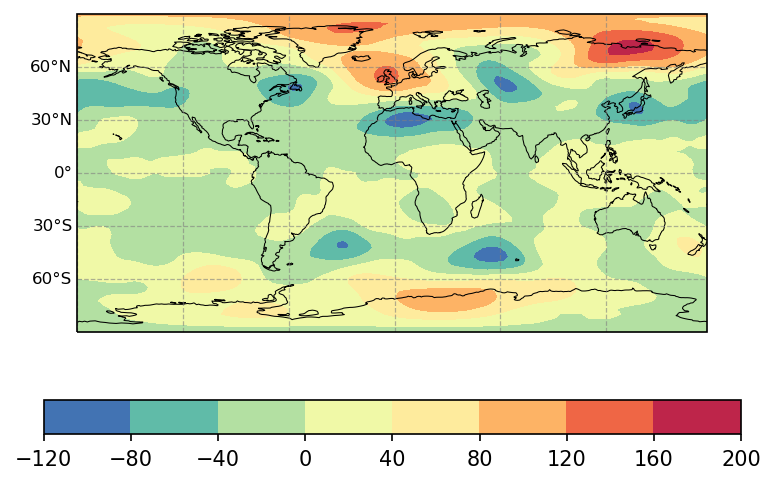

In [8]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

plt.figure(figsize=(6,4),dpi=150)
gs = gridspec.GridSpec(1,1)
ax = plt.axes(projection=proj)
ax.coastlines(linewidth=0.5)

a1 = ax.contourf(lon2d, lat2d, serie_anom[0,:,:], cmap = cmap)
gl = ax.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}
plt.colorbar(a1,orientation="horizontal")

In [9]:
info = {'file': '../data/Hgt_500hPa_Anomalies_Jan80_Dec83.nc', # filename and directory
        'title': 'Geopotential Height', # netcdf title
        'year_start':1980,'month_start':1,'day_start':1,'hour_start':0,'minute_start':0, # time start (year,month,day,hour,minute)
        'year_end':1983,'month_end':12,'day_end':1,'hour_end':23,'minute_end':59, # time end (year,month,day,hour,minute)
        'time_frequency': 'Monthly', # options: Monthly, Daily, Hourly, Minutely
        'time_interval':1,
        'var_name': 'hgt', # variable short name
        'var_units': 'hPa'} # variable units

In [10]:
ca.create_netcdf(info,lat,lon,serie_anom)

Time Start: 1980-01-01 00:00:00
Time End: 1983-12-01 00:00:00
Time Frequency: Monthly
Time Lenght: 48

File created in:  ../data/Hgt_500hPa_Anomalies_Jan80_Dec83.nc
File title:  Geopotential Height
var title:  hgt
var units:  hPa
